In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [ ]:
df = pd.read_csv("/content/dataset.csv")
df.head()

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00


Data Processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      18368 non-null  int64  
 1   SystemCodeNumber        18368 non-null  object 
 2   Capacity                18368 non-null  int64  
 3   Latitude                18368 non-null  float64
 4   Longitude               18368 non-null  float64
 5   Occupancy               18368 non-null  int64  
 6   VehicleType             18368 non-null  object 
 7   TrafficConditionNearby  18368 non-null  object 
 8   QueueLength             18368 non-null  int64  
 9   IsSpecialDay            18368 non-null  int64  
 10  LastUpdatedDate         18368 non-null  object 
 11  LastUpdatedTime         18368 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


In [ ]:
df.describe()

,ID,Capacity,Latitude,Longitude,Occupancy,QueueLength,IsSpecialDay
count,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000
mean,9183.500000,1605.214286,25.706547,90.751170,731.084059,4.587925,0.150915
std,5302.529208,1131.153886,1.582749,3.536636,621.164982,2.580062,0.357975
min,0.000000,387.000000,20.000035,78.000003,2.000000,0.000000,0.000000
25%,4591.750000,577.000000,26.140048,91.727995,322.000000,2.000000,0.000000
50%,9183.500000,1261.000000,26.147482,91.729511,568.000000,4.000000,0.000000
75%,13775.250000,2803.000000,26.147541,91.736172,976.000000,6.000000,0.000000
max,18367.000000,3883.000000,26.150504,91.740994,3499.000000,15.000000,1.000000


In [ ]:
df.columns

Index(['ID', 'SystemCodeNumber', 'Capacity', 'Latitude', 'Longitude',
       'Occupancy', 'VehicleType', 'TrafficConditionNearby', 'QueueLength',
       'IsSpecialDay', 'LastUpdatedDate', 'LastUpdatedTime'],
      dtype='object')

Missing vales - there is no missing values in the given dataset

In [ ]:
df.isnull().sum()

,0
ID,0
SystemCodeNumber,0
Capacity,0
Latitude,0
Longitude,0
Occupancy,0
VehicleType,0
TrafficConditionNearby,0
QueueLength,0
IsSpecialDay,0


Converting the time realtes column to datetime for time series analysis

In [ ]:
df1 = df.copy()

In [ ]:
df1['LastUpdatedDate'] =  pd.to_datetime(df1['LastUpdatedDate'],format = "%d-%m-%Y")
df1['LastUpdatedTime'] = pd.to_datetime(df1['LastUpdatedTime'],format = "%H:%M:%S").dt.time

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      18368 non-null  int64         
 1   SystemCodeNumber        18368 non-null  object        
 2   Capacity                18368 non-null  int64         
 3   Latitude                18368 non-null  float64       
 4   Longitude               18368 non-null  float64       
 5   Occupancy               18368 non-null  int64         
 6   VehicleType             18368 non-null  object        
 7   TrafficConditionNearby  18368 non-null  object        
 8   QueueLength             18368 non-null  int64         
 9   IsSpecialDay            18368 non-null  int64         
 10  LastUpdatedDate         18368 non-null  datetime64[ns]
 11  LastUpdatedTime         18368 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), ob

In [ ]:
df1.head()

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,2016-10-04,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,2016-10-04,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,2016-10-04,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,2016-10-04,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,2016-10-04,09:59:00


Making some new columns and rename the old columns


In [ ]:
df1['Time'] = df1['LastUpdatedDate'] + pd.to_timedelta(df1['LastUpdatedTime'].astype(str))
df1.rename(columns={'SystemCodeNumber':'LotID',
                    'TrafficConditionNearby':'Traffic',
                    'VehicleType' : 'Vechile',
                    },inplace=True)

In [ ]:
df1.head()

,ID,LotID,Capacity,Latitude,Longitude,Occupancy,Vechile,Traffic,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Time
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,2016-10-04,07:59:00,2016-10-04 07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,2016-10-04,08:25:00,2016-10-04 08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,2016-10-04,08:59:00,2016-10-04 08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,2016-10-04,09:32:00,2016-10-04 09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,2016-10-04,09:59:00,2016-10-04 09:59:00


converting the catagorical columns in the numerical values

In [ ]:
df1['Vechile'].unique()
vechile_map = {'car': 1, 'bike' : 2, 'truck' :3, 'cycle': 4}
df1['Vechile'] = df1['Vechile'].map(vechile_map)

In [ ]:
df1['Traffic'].unique()
traffic_map = {'low': 1, 'average' : 2, 'high' :3}
df1['Traffic'] = df['TrafficConditionNearby'].map(traffic_map)

In [ ]:
df1['Occupancy_Rate'] = df1['Occupancy']/df1['Capacity']

In [ ]:
df['IsSpecialDay'].unique()

array([0, 1])

extracting the date, week,time hour min

In [ ]:
df1['Date'] = df1['Time'].dt.date
df1['year'] = df1['Time'].dt.year
df1['Hour'] = df1['Time'].dt.hour
df1['Min'] = df1['Time'].dt.minute
df1['month'] = df1['Time'].dt.month
df1['week'] = df1['Time'].dt.weekday

In [ ]:
df1.head()

,ID,LotID,Capacity,Latitude,Longitude,Occupancy,Vechile,Traffic,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Time,Occupancy_Rate,Date,year,Hour,Min,month,week
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,1,1,1,0,2016-10-04,07:59:00,2016-10-04 07:59:00,0.105719,2016-10-04,2016,7,59,10,1
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,1,1,1,0,2016-10-04,08:25:00,2016-10-04 08:25:00,0.110919,2016-10-04,2016,8,25,10,1
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,1,1,2,0,2016-10-04,08:59:00,2016-10-04 08:59:00,0.138648,2016-10-04,2016,8,59,10,1
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,1,1,2,0,2016-10-04,09:32:00,2016-10-04 09:32:00,0.185442,2016-10-04,2016,9,32,10,1
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,2,1,2,0,2016-10-04,09:59:00,2016-10-04 09:59:00,0.259965,2016-10-04,2016,9,59,10,1


<Axes: ylabel='Density'>

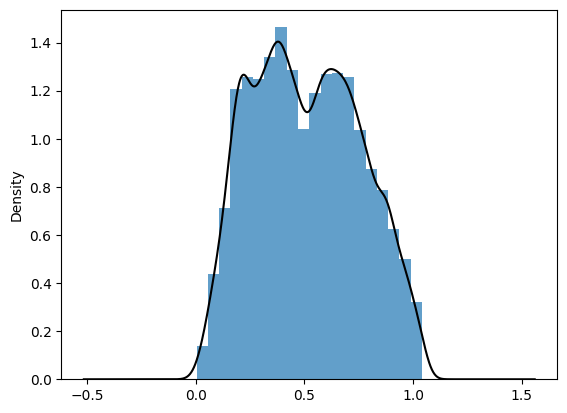

In [ ]:
df1['Occupancy_Rate'].plot(kind='hist', bins=20, density=True, alpha=0.7)
df1['Occupancy_Rate'].plot(kind='kde', color='black')

# Model 1: Baseline Linear Model

In [ ]:
df1 = df1.sort_values(by=['LotID', 'Time']).reset_index(drop=True)
df1.head()

,ID,LotID,Capacity,Latitude,Longitude,Occupancy,Vechile,Traffic,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Time,Occupancy_Rate,Date,year,Hour,Min,month,week
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,1,1,1,0,2016-10-04,07:59:00,2016-10-04 07:59:00,0.105719,2016-10-04,2016,7,59,10,1
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,1,1,1,0,2016-10-04,08:25:00,2016-10-04 08:25:00,0.110919,2016-10-04,2016,8,25,10,1
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,1,1,2,0,2016-10-04,08:59:00,2016-10-04 08:59:00,0.138648,2016-10-04,2016,8,59,10,1
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,1,1,2,0,2016-10-04,09:32:00,2016-10-04 09:32:00,0.185442,2016-10-04,2016,9,32,10,1
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,2,1,2,0,2016-10-04,09:59:00,2016-10-04 09:59:00,0.259965,2016-10-04,2016,9,59,10,1


In [ ]:
df1['BaslinePrice'] = 10.0

basline model function

In [ ]:
def baseline_linear_model(prev_price, occupancy, capacity, alpha=5):
  return prev_price + alpha * (occupancy / capacity)

In [ ]:
df1.head()

,ID,LotID,Capacity,Latitude,Longitude,Occupancy,Vechile,Traffic,QueueLength,IsSpecialDay,...,LastUpdatedTime,Time,Occupancy_Rate,Date,year,Hour,Min,month,week,BaslinePrice
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,1,1,1,0,...,07:59:00,2016-10-04 07:59:00,0.105719,2016-10-04,2016,7,59,10,1,10.0
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,1,1,1,0,...,08:25:00,2016-10-04 08:25:00,0.110919,2016-10-04,2016,8,25,10,1,10.0
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,1,1,2,0,...,08:59:00,2016-10-04 08:59:00,0.138648,2016-10-04,2016,8,59,10,1,10.0
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,1,1,2,0,...,09:32:00,2016-10-04 09:32:00,0.185442,2016-10-04,2016,9,32,10,1,10.0
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,2,1,2,0,...,09:59:00,2016-10-04 09:59:00,0.259965,2016-10-04,2016,9,59,10,1,10.0


In [ ]:
latest_prices = {lot: 10.0 for lot in df1['LotID'].unique()}
for i in range(len(df1)):
    row = df1.loc[i]
    lot = row['LotID']
    occ = row['Occupancy']
    cap = row['Capacity']
    prev_price = latest_prices[lot]

    new_price = baseline_linear_model(prev_price, occ, cap)
    df1.at[i, 'BaselinePrice_pridicted'] = new_price
    latest_prices[lot] = new_price

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Category20
output_notebook()

# Choose a few sample lots to plot
sample_lots = df1['LotID'].unique()
p = figure(title="Baseline Pricing Over Time", x_axis_type="datetime", width=900, height=600)
colors = Category20[20]

for i, lot in enumerate(sample_lots):
    lot_df = df1[df1['LotID'] == lot]
    p.line(lot_df['Time'], lot_df['BaselinePrice_pridicted'], line_width=2, legend_label=lot, color=colors[i])

p.xaxis.axis_label = "Time"
p.yaxis.axis_label = "Price ($)"
p.legend.location = "top_left"
show(p)


# Model-2 Demand Based Price Function

In [ ]:
df1.head()

,ID,LotID,Capacity,Latitude,Longitude,Occupancy,Vechile,Traffic,QueueLength,IsSpecialDay,...,Time,Occupancy_Rate,Date,year,Hour,Min,month,week,BaslinePrice,BaselinePrice_pridicted
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,1,1,1,0,...,2016-10-04 07:59:00,0.105719,2016-10-04,2016,7,59,10,1,10.0,10.528596
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,1,1,1,0,...,2016-10-04 08:25:00,0.110919,2016-10-04,2016,8,25,10,1,10.0,11.083189
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,1,1,2,0,...,2016-10-04 08:59:00,0.138648,2016-10-04,2016,8,59,10,1,10.0,11.776430
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,1,1,2,0,...,2016-10-04 09:32:00,0.185442,2016-10-04,2016,9,32,10,1,10.0,12.703640
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,2,1,2,0,...,2016-10-04 09:59:00,0.259965,2016-10-04,2016,9,59,10,1,10.0,14.003466


In [ ]:
def compute_demand(row, weights):
    α, β, γ, δ, ε = weights
    return (
        α * (row['Occupancy'] / row['Capacity']) +
        β * row['QueueLength'] +
        γ * row['Traffic'] +
        δ * row['IsSpecialDay'] +
        ε * row['Vechile']
    )

In [ ]:
def demand_price_model(base_price,demand,λ=0.5):
  demand_norm = min(demand / 10, 1.0)
  price = base_price * (1 + λ * demand_norm)
  return max(0.5 * base_price, min(price, 2 * base_price))

In [ ]:
base_price = 10
weights = (2.0, 1.5, 1.0, 0.5, 1.5)

df1['Demand'] = df1.apply(lambda row: compute_demand(row, weights), axis=1)
df1['Model2Price'] = df1['Demand'].apply(lambda d: demand_price_model(base_price, d))

In [ ]:
df1['NormalizedDemand'] = df1['Demand'] / 10
df1['NormalizedDemand'].describe()
max_demand = df1['Demand'].max()
df1['NormalizedDemand'] = df1['Demand'] / max_demand

λ = 1.0

df1['Model2Price'] = base_price * (1 + λ * df1['NormalizedDemand'])
df1['Model2Price'] = df1['Model2Price'].clip(lower=0.5 * base_price, upper=2 * base_price)


In [ ]:
df1['Model2Price'] = df1.groupby('LotID')['Model2Price'].transform(lambda x: x.rolling(3, min_periods=1).mean())


In [ ]:
df1.head()

,ID,LotID,Capacity,Latitude,Longitude,Occupancy,Vechile,Traffic,QueueLength,IsSpecialDay,...,year,Hour,Min,month,week,BaslinePrice,BaselinePrice_pridicted,Demand,Model2Price,NormalizedDemand
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,1,1,1,0,...,2016,7,59,10,1,10.0,10.528596,4.211438,11.320130,0.132013
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,1,1,1,0,...,2016,8,25,10,1,10.0,11.083189,4.221837,11.321760,0.132339
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,1,1,2,0,...,2016,8,59,10,1,10.0,11.776430,5.777296,11.484829,0.181097
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,1,1,2,0,...,2016,9,32,10,1,10.0,12.703640,5.870884,11.658221,0.184030
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,2,1,2,0,...,2016,9,59,10,1,10.0,14.003466,7.519931,12.002831,0.235722


Plot Visulatation

In [ ]:
!pip install pathway

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of boto3 to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 2

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Category10
from bokeh.models import HoverTool
output_notebook()

sample_lots = df1['LotID'].unique()[:3]
colors = Category10[10]

# Create figure
p2 = figure(title="Model 2: Demand-Based Price Over Time",
            x_axis_type="datetime", width=1000, height=450,
            tools="pan,wheel_zoom,box_zoom,reset,save")

# Add hover tool
hover = HoverTool(
    tooltips=[
        ("Time", "@x{%F %H:%M}"),
        ("Price", "@y{$0.00}"),
    ],
    formatters={'@x': 'datetime'},
    mode='vline'
)
p2.add_tools(hover)

# Plot each lot
for i, lot in enumerate(sample_lots):
    lot_df = df1[df1['LotID'] == lot]
    p2.line(x=lot_df['Time'], y=lot_df['Model2Price'],
            line_width=2, legend_label=str(lot), color=colors[i])

# Axis styling
p2.xaxis.axis_label = "Time"
p2.yaxis.axis_label = "Price ($)"
p2.title.text_font_size = "16pt"
p2.xaxis.axis_label_text_font_size = "12pt"
p2.yaxis.axis_label_text_font_size = "12pt"
p2.legend.location = "top_left"
p2.legend.label_text_font_size = "10pt"

show(p2)


Comparing model 1 with model 2

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Category10
from bokeh.models import HoverTool
output_notebook()

# Choose 1 or 2 lots for clean comparison
lot_id = df1['LotID'].unique()[0]  # change index to plot a different lot
lot_df = df1[df1['LotID'] == lot_id]

# Create figure
p = figure(title=f"Model 1 vs Model 2 Pricing — Lot {lot_id}",
           x_axis_type="datetime", width=1000, height=450,
           tools="pan,wheel_zoom,box_zoom,reset,save")

# Add hover tool
hover = HoverTool(
    tooltips=[
        ("Time", "@x{%F %H:%M}"),
        ("Price", "@y{$0.00}"),
    ],
    formatters={'@x': 'datetime'},
    mode='vline'
)
p.add_tools(hover)

# Plot Model 1 price (Baseline)
p.line(x=lot_df['Time'], y=lot_df['BaselinePrice_pridicted'],
       line_width=2, legend_label="Model 1 (Baseline)", color=Category10[10][0])

# Plot Model 2 price (Demand-Based)
p.line(x=lot_df['Time'], y=lot_df['Model2Price'],
       line_width=2, legend_label="Model 2 (Demand-Based)", color=Category10[10][1])

# Styling
p.xaxis.axis_label = "Time"
p.yaxis.axis_label = "Price ($)"
p.title.text_font_size = "16pt"
p.legend.location = "top_left"
p.legend.label_text_font_size = "10pt"

show(p)


In [ ]:
df1.to_csv('modified_csv.csv', index=False)

# Pathwaty Integration